In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


# stats
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('https://bit.ly/39uuK7J',delimiter=",")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


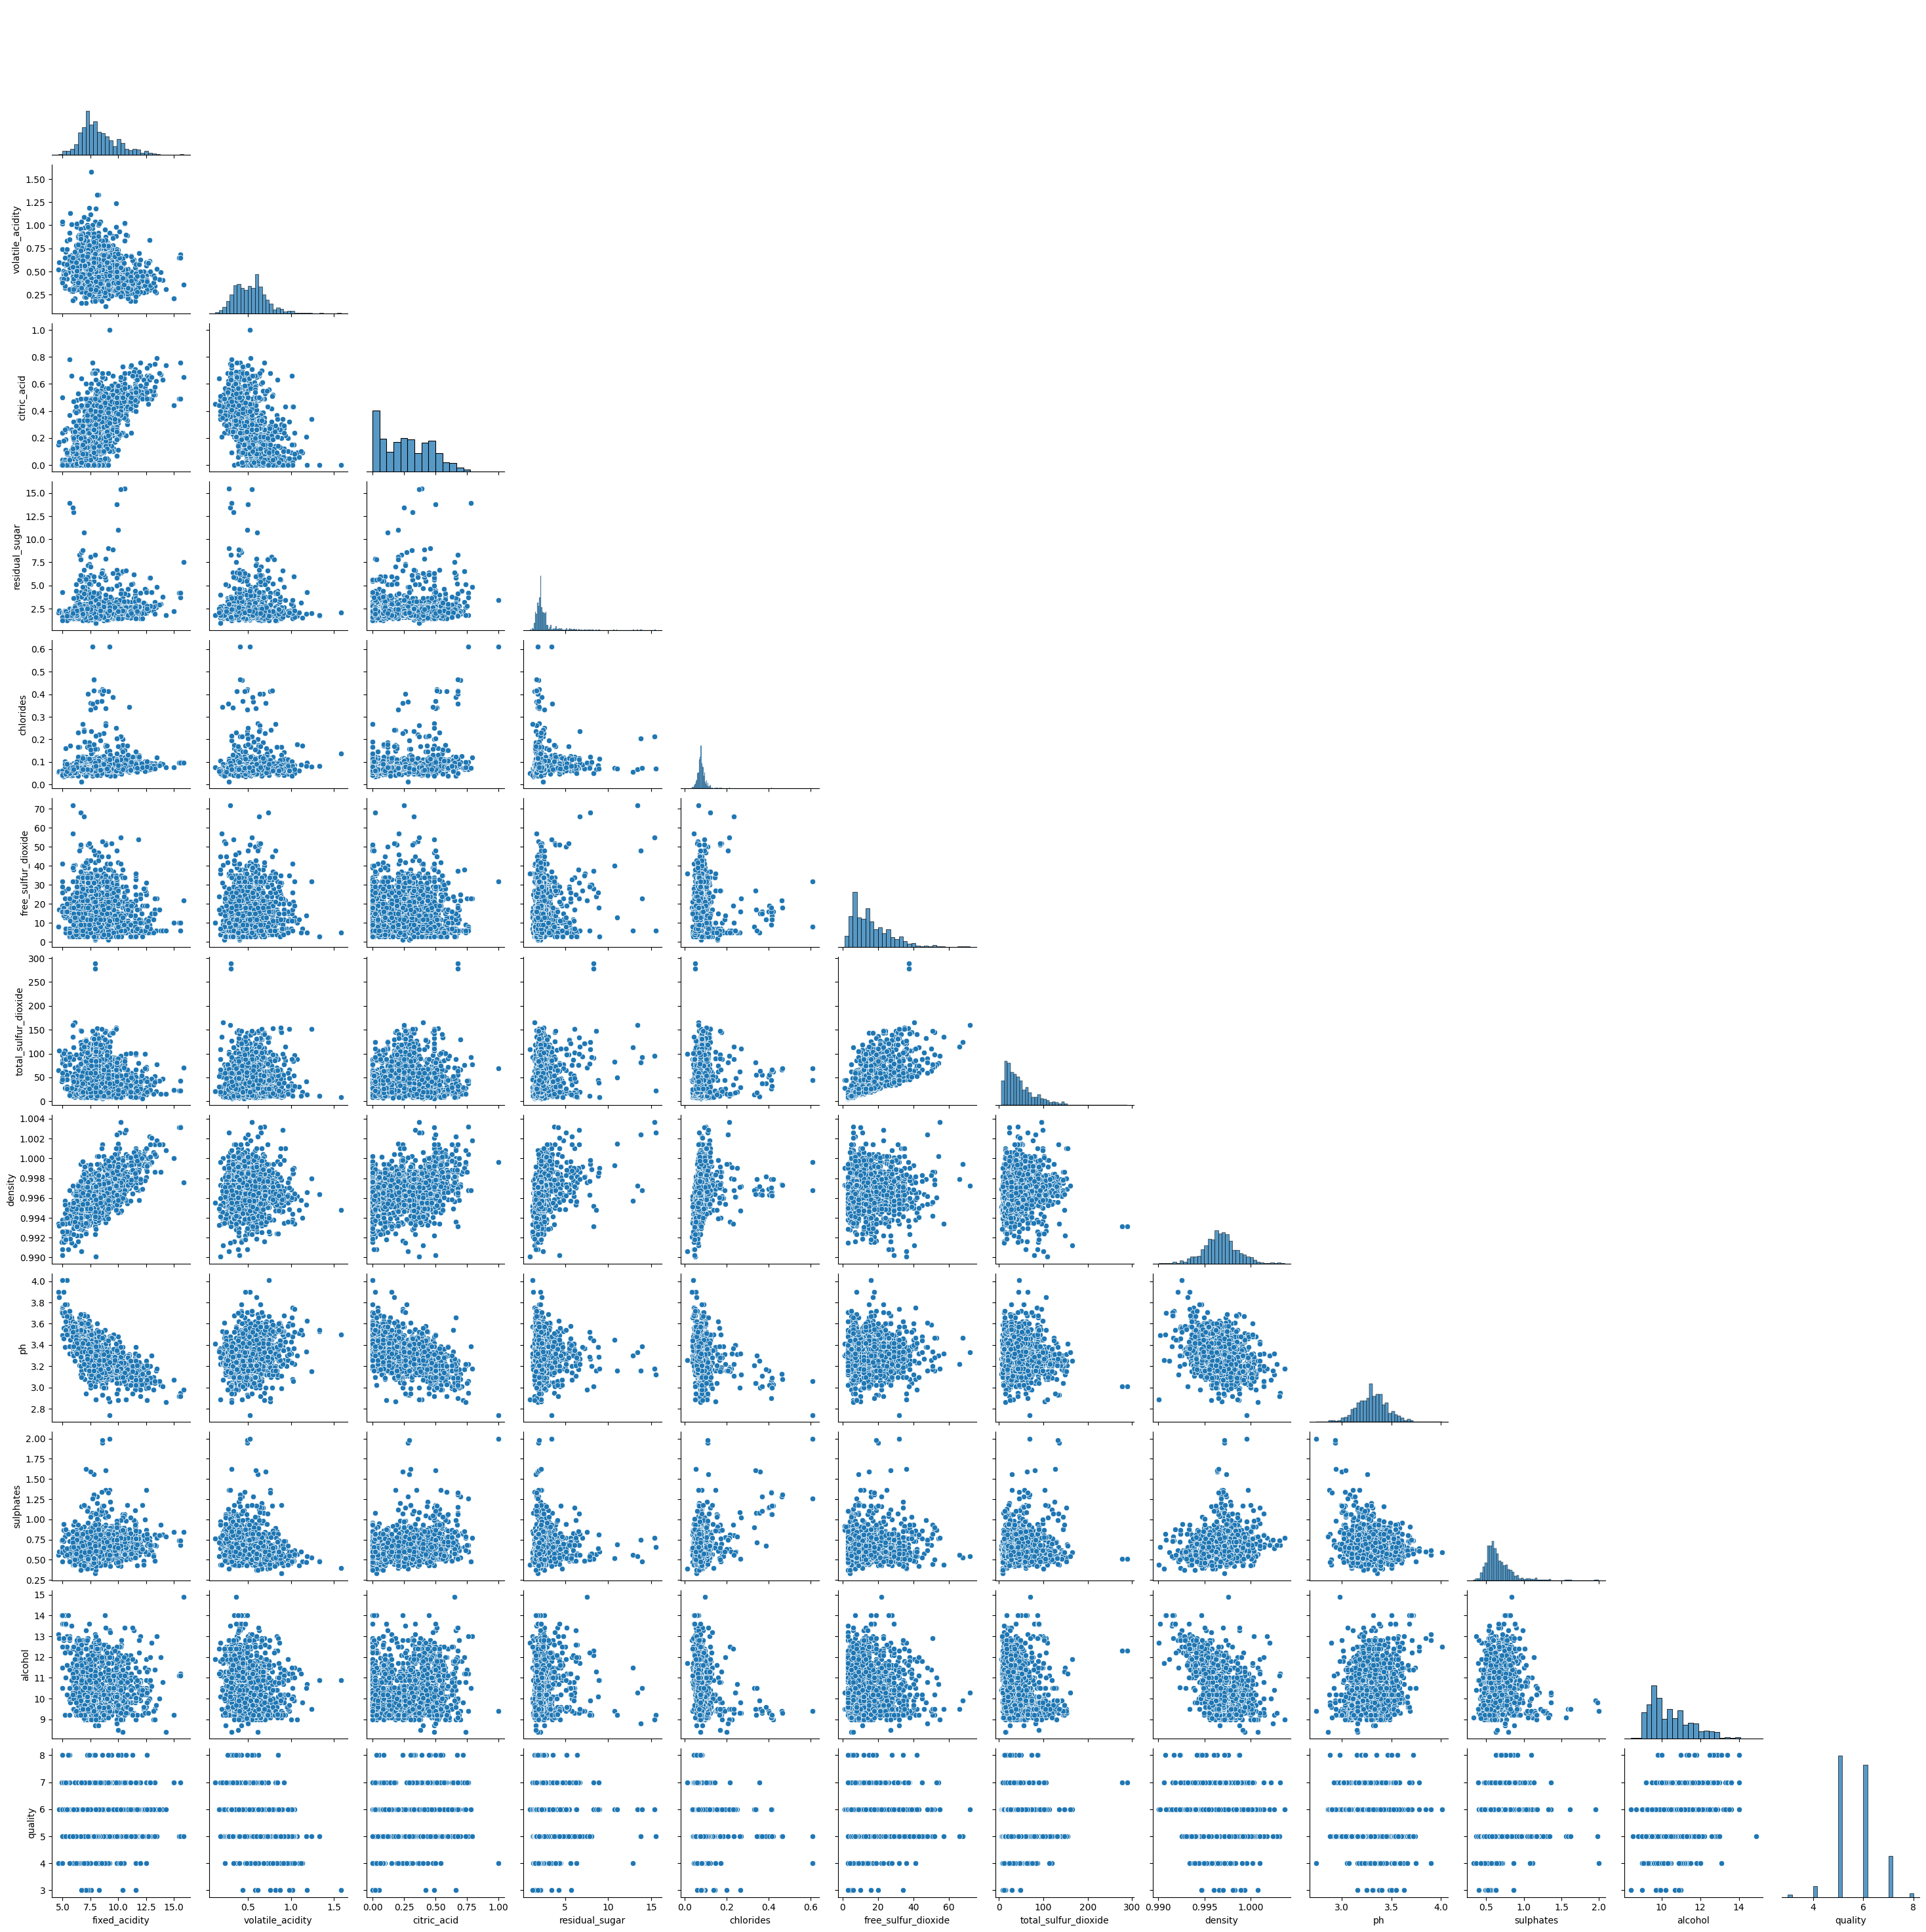

In [4]:
sns.pairplot(data=df,corner=True)

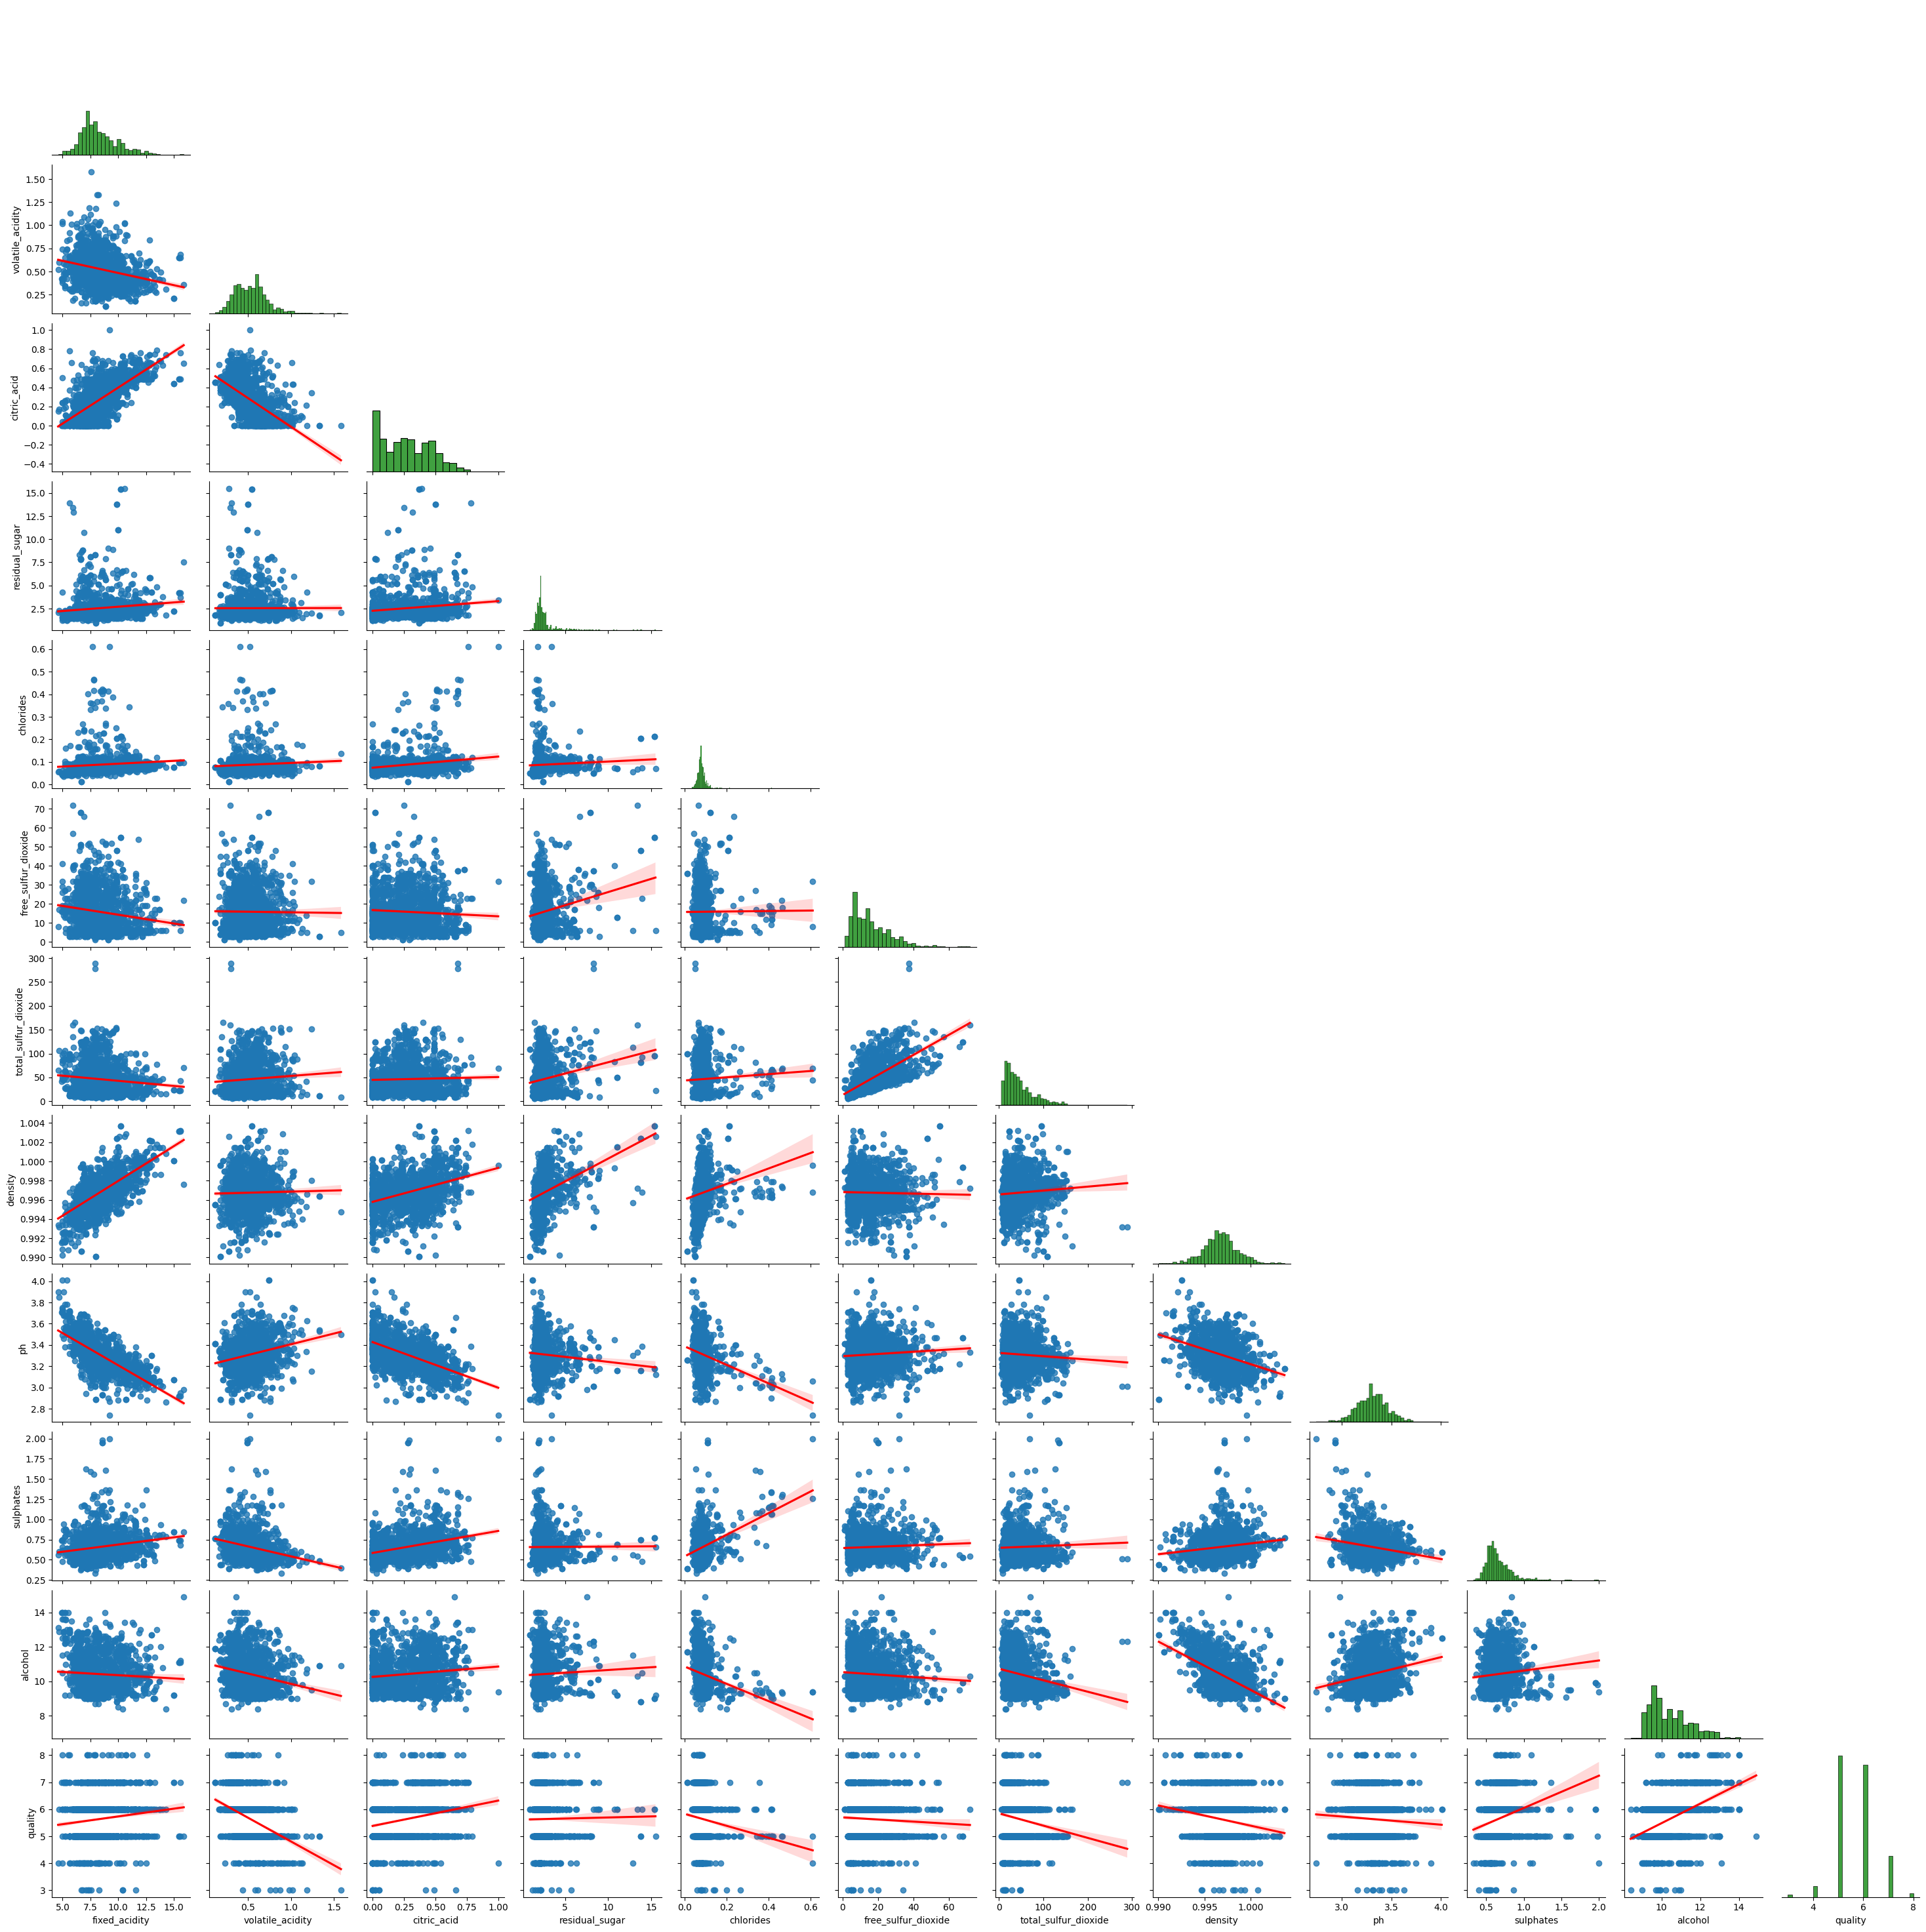

In [5]:
sns.pairplot(df,
             diag_kws={'color':'green'},
             kind='reg',
             plot_kws={'line_kws':{'color': 'red'}},
             corner=True
            )
plt.show()

In [6]:
correlation_matrix=df.corr()
correlation_matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
ph,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

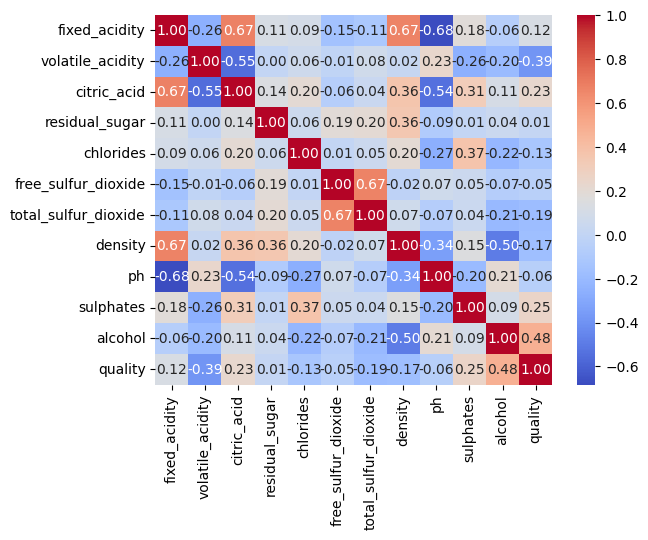

In [7]:
# Create a heatmap

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [8]:
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [9]:
# create a Python list of three feature names
feature_cols = ['fixed_acidity', 'citric_acid', 'density']

# use the list to select a subset of the DataFrame (X)
X = df[feature_cols]

In [10]:
# select the Sales column as the response (y)
y = df.quality

In [11]:
X

,fixed_acidity,citric_acid,density
0,7.4,0.00,0.99780
1,7.8,0.00,0.99680
2,7.8,0.04,0.99700
3,11.2,0.56,0.99800
4,7.4,0.00,0.99780
...,...,...,...
1594,6.2,0.08,0.99490
1595,5.9,0.10,0.99512
1596,6.3,0.13,0.99574
1597,5.9,0.12,0.99547


In [12]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [13]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')* -1
print (scores)

[0.48398744 0.58603551 0.64981753 0.60859387 0.4273027  0.66625376
 0.5086038  0.53725926 0.55794176 0.60400308]


In [14]:
scores.mean()

0.5629798717118264

In [15]:
# create a Python list of three feature names
feature_cols = ['volatile_acidity','alcohol']

# use the list to select a subset of the DataFrame (X)
X = df[feature_cols]



In [16]:
X

,volatile_acidity,alcohol
0,0.700,9.4
1,0.880,9.8
2,0.760,9.8
3,0.280,9.8
4,0.700,9.4
...,...,...
1594,0.600,10.5
1595,0.550,11.2
1596,0.510,11.0
1597,0.645,10.2


In [24]:
# 10-fold cross-validation with all three features
# mse , we need to minimize this score
scores_1 = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')*-1 # convert maximum to minimum
print (scores_1)

[0.4088009  0.4225112  0.52422069 0.46507575 0.35962069 0.53727289
 0.42450769 0.44432039 0.39009877 0.51511652]


In [26]:
scores_1.mean()

0.4491545479776568

In [22]:
lm.fit(X, y)

LinearRegression()

In [27]:
lm.predict([[1, 1]])

array([2.02564808])